<a href="https://colab.research.google.com/github/CMicha/M049/blob/main/3_1_Download_CHIRPS_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<table style="width: 100%">
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td ><center><font size="5"><b>Module 49</b></font><center>
                <center><font size="6">Digital Innovations for Water Challenges</font><center></td>
			</tr>
			<tr>
                <td><center><font size="14">Topic 4 Notebook 1</font><center></td>
			</tr>
			<tr>
                <td><center><font size="6"><b>CHIRPS data download</b></font><center></td>
			</tr>
		</table>
		</td>
		<td><center><img src='https://www.un-ihe.org/images/spa/logo-ihe.svg#default'></img></td>
	</tr>
</table>
</div>

# Table of contents
1. [Learning objectives](#learningobs)
2. [Introduction](#introduction)
3. [Download data from ftp](#ftp)
4. [Download data using OPeNDAP](#opendap)

# 1. Learning objectives<a name="learningobs"></a>

- Download data from ftp
- Unzip files
- Practice building a loop
- Practice string formatting
- Download data using OPeNDAP to subset region

# 2. Introduction<a name="introduction"></a>
In this notebook you will learn to download CHIRPS data from a region of interest using 2 methods:
- as tiff files from the UCSB ftp site using simple ftp: https://data.chc.ucsb.edu/products/CHIRPS-2.0/
- as .nc files from the NOAA coastwatch website using the OPeNDAP (https://www.opendap.org/) framework:
https://coastwatch.pfeg.noaa.gov/erddap/griddap/chirps20GlobalDailyP05.html

You will need the following python packages installed:  
>wget <br> gzip

In [9]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7adabc1e788101e5ef9b3d5aafd46e27f150e903a4bcb2e9c361f227cd5e45c6
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [10]:
#load modules
import wget
import gzip
import datetime
import os
from pathlib import Path

>*Reminder*: if you get a ModuleNotFoundError you can install them from within the notebook by running:  
!conda install *packagename*    
            or  
            !pip install *packagename*    

In [ ]:
#!pip install wget

# 3. Download CHIRPS from the UCSB ftp site <a name="ftp"></a>
From the homepage of CHIRPS you can navigate to the ftp where the data is hosted.
https://data.chc.ucsb.edu/products/CHIRPS-2.0/ <br>
From here you can navigate the folders to reach the specific files you are interested in - we will learn how to download these files using wget.

### 3.a. First we will create folder where you wish to place the files and navigate to the directory

In [11]:
os.getcwd()

'/CHIRPS_nc_2023'

In [15]:
Path(r"/CHIRPS_tiff_2023").mkdir(parents=True, exist_ok=True)
os.chdir(r"/CHIRPS_tiff_2023")

In [16]:
os.getcwd()

'/CHIRPS_tiff_2023'

Note: If you want to check the directory you are currently in you can use the following command:
>os.getcwd()

### 3.b. Next identify the path to the file you want to download and use wget to download the data
Navigate the ftp site to find the file you want to download. In the cell below we have chosen the daily data for the entire globe for 01/01/2022.

In [17]:
link_to_file_1 = r'https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/tifs/p05/2022/chirps-v2.0.2022.01.01.tif.gz'

To obtain the file using wget, simply run the command below:

In [18]:
fout = wget.download(link_to_file_1)

In [19]:
fout

'chirps-v2.0.2022.01.01.tif.gz'

In [20]:
fout[:-3]

'chirps-v2.0.2022.01.01.tif'

### 3.c. You now have a zipped file - let's unzip it using gzip

In [21]:
outfilename = fout[:-3]
with gzip.GzipFile(fout, 'rb') as zf:
    file_content = zf.read()
    save_file_content = open(outfilename, 'wb')
    save_file_content.write(file_content)
save_file_content.close()
zf.close()

### 3.d. OPTIONAL Exercise: Create a loop to download all data from one year

Write a code to download all CHIRPS monthly data for Africa from 2020.
<br>Hint: you can use the f-strings formatting in a loop (https://docs.python.org/3/tutorial/inputoutput.html)
<br>For example:
```python
for i in [1,2]:   
    print(f'The value of i is {i}')
```
will return: <br>
>The value of i is 1 <br>
>The value of i is 2

You can then format this output to match your needs. For example if you look at the format of the file names you will see that the month is a padded integer, i.e. 01 for january instead of 1.

```python
for i in [1,2]:   
    print(f'The value of i is {i:02d}')
```
will return: <br>
>The value of i is 01 <br>
>The value of i is 02

>You can find some more examples here: https://docs.python.org/3/library/string.html#format-string-syntax

In [25]:
#Run this cell as an example of string formatting
for i in [1,2]:
    print(f'The value of i is {i:02d}')

The value of i is 01
The value of i is 02


####Make a loop to print all month numbers in the format '01', '02'..., '12'

In [26]:
#@title What

#enter code here:
list(range(1,13,1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [27]:
# %load ../solutions/solution_1.py

#### Now try to print all names of the files you want (all months of 2022)
> Remeber the link to the january file was: <br> r'https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/tifs/p05/2022/chirps-v2.0.2022.01.01.tif.gz'

In [28]:
for i in list(range(1,13)):
    print(f'The value of i is {i:02d}')

The value of i is 01
The value of i is 02
The value of i is 03
The value of i is 04
The value of i is 05
The value of i is 06
The value of i is 07
The value of i is 08
The value of i is 09
The value of i is 10
The value of i is 11
The value of i is 12


In [29]:
#enter your code here:
for i in list(range(1,13)):
    file_1 = f'https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_monthly/tifs/chirps-v2.0.2022.{i:02d}.tif.gz'
    fout = wget.download(file_1)
    outfilename = fout[:-3]
    with gzip.GzipFile(fout, 'rb') as zf:
        file_content = zf.read()
        save_file_content = open(outfilename, 'wb')
        save_file_content.write(file_content)
    save_file_content.close()
    zf.close()

#### Put everything together and try to make one loop which:
> 1. Downloads all monthly files for 2022
2. Unzips the files

In [31]:
#enter your code here:



# 4. From the NOAA server using OPeNDAP <a name="opendap"></a>
In part 1. we downloaded data from an ftp. While we could select the months or days of interest, in terms of spatial extent we could only choose pre-existing tiles.
Using the OPeNDAP framework, we can make calls to download only data from a specific area as well.

### 4.a. Create a new folder for the .nc data

In [3]:
Path(r"../CHIRPS_nc_2023").mkdir(parents=True, exist_ok=True)
os.chdir(r"../CHIRPS_nc_2023")

### 4.b. Define the time period and geographic area you wish to download

In [4]:
start_date = datetime.datetime(2021,1,1)
end_date = datetime.datetime(2022,12,1)

bounding_box = [-10, 0, 5, 15] #bounding_box = [latmin, latmax, lonmin, lonmax]

In [5]:
year_st = start_date.year
m_st = start_date.month
d_st = start_date.day
year_end = end_date.year
m_end = end_date.month
d_end = end_date.day

lat_1 = bounding_box[0]
lat_2 = bounding_box[1]
lon_1 = bounding_box[2]
lon_2 = bounding_box[3]

In [6]:
path_to_nc = f'https://coastwatch.pfeg.noaa.gov/erddap/griddap/chirps20GlobalMonthlyP05.nc?precip%5B({year_st}-{m_st:02d}-{d_st:02d}T00:00:00Z):1:({year_end}-{m_end:02d}-{d_end:02d}T00:00:00Z)%5D%5B({lat_1}):1:({lat_2})%5D%5B({lon_1}):1:({lon_2})%5D'

In [7]:
print(path_to_nc)

https://coastwatch.pfeg.noaa.gov/erddap/griddap/chirps20GlobalMonthlyP05.nc?precip%5B(2021-01-01T00:00:00Z):1:(2022-12-01T00:00:00Z)%5D%5B(-10):1:(0)%5D%5B(5):1:(15)%5D


In [41]:
os.getcwd()

'/CHIRPS_tiff_2023'

In [40]:
wget.download(path_to_nc)

'chirps20GlobalMonthlyP05_2324_f8fe_f9be.nc'

## How does it work?  
Go to the website: https://coastwatch.pfeg.noaa.gov/erddap/griddap/chirps20GlobalDailyP05.html   
Explore the options and see if you can understand how we got to the creation of path_to_nc.


## Optional Exercise
From the page https://coastwatch.pfeg.noaa.gov/erddap/griddap/index.html?page=1&itemsPerPage=1000
Try to create a similar code as the one presented above to download the daily instead of monthly CHIRPS data.

# 5. Taking a quick look at the data <a name="Visualize"></a>

In [37]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00


In [42]:
import glob
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt

In [51]:
os.chdir(r'/CHIRPS_tiff_2023')

In [52]:
os.getcwd()

'/CHIRPS_tiff_2023'

In [46]:
filename = r"chirps-v2.0.2022.01.tif"
data = rioxarray.open_rasterio(filename)

In [47]:
data

<xarray.DataArray (band: 1, y: 2000, x: 7200)> Size: 58MB
[14400000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 49.97 49.92 49.87 ... -49.88 -49.93 -49.98
  * x            (x) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_DOCUMENTNAME:      /home/CHIRPS/monthly/v2.0/chirps-v2.0.2022.01.tif
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_DATETIME:          2022:02:15 13:18:55
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

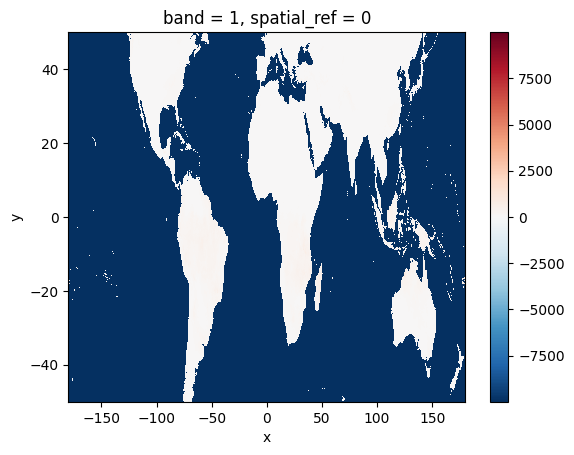

In [48]:
data.plot()

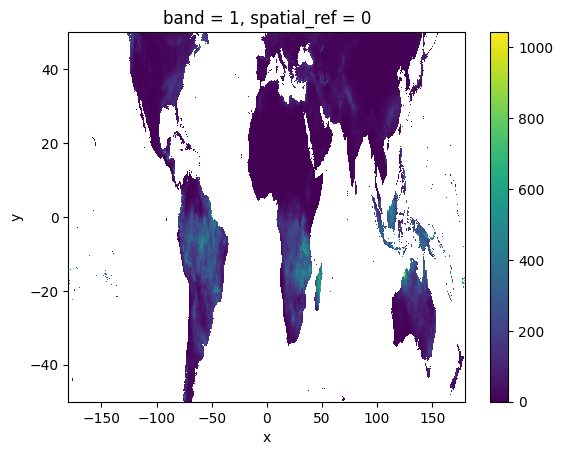

In [49]:
ds_masked = data.where(data != -9999.) #this keeps only data for pixels with values different than -9999
ds_masked.plot()

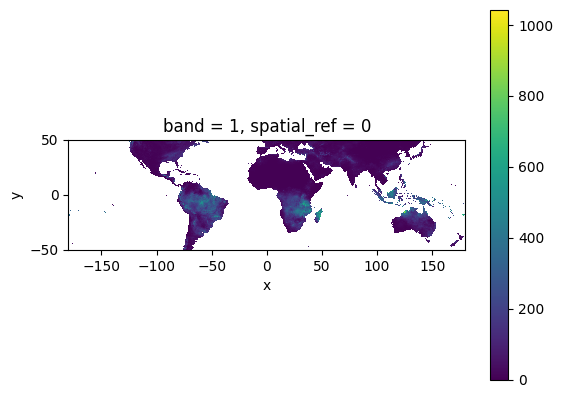

In [50]:
ds_masked.plot()
plt.gca().set_aspect('equal', adjustable='box')

####Inspecting the netCDF file

In [57]:
path_to_nc = r"/CHIRPS_nc_2023/chirps20GlobalMonthlyP05_2324_f8fe_f9be.nc"


In [58]:
data_nc = xr.open_dataset(path_to_nc)

In [ ]:
data_nc

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 24, latitude: 201, longitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 192B 2021-01-01 2021-02-01 ... 2022-12-01
  * latitude   (latitude) float32 804B -9.975 -9.925 -9.875 ... -0.025 0.025
  * longitude  (longitude) float32 804B 5.025 5.075 5.125 ... 14.93 14.97 15.02
Data variables:
    precip     (time, latitude, longitude) float32 4MB ...
Attributes: (12/31)
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    creator_type:              person
    ...                        ...
    summary:                   This dataset has monthly averages of the Clima...
    time_coverage_end:         2022-12-01T00:00:00Z
    time_coverage_start:       2021-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       5.024994

In [59]:
data_nc.precip

<xarray.DataArray 'precip' (time: 24, latitude: 201, longitude: 201)> Size: 4MB
[969624 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 192B 2021-01-01 2021-02-01 ... 2022-12-01
  * latitude   (latitude) float32 804B -9.975 -9.925 -9.875 ... -0.025 0.025
  * longitude  (longitude) float32 804B 5.025 5.075 5.125 ... 14.93 14.97 15.02
Attributes:
    colorBarMaximum:  400.0
    colorBarMinimum:  0.0
    ioos_category:    Meteorology
    long_name:        Precipitation
    standard_name:    lwe_precipitation_rate
    time_step:        month
    units:            mm/month

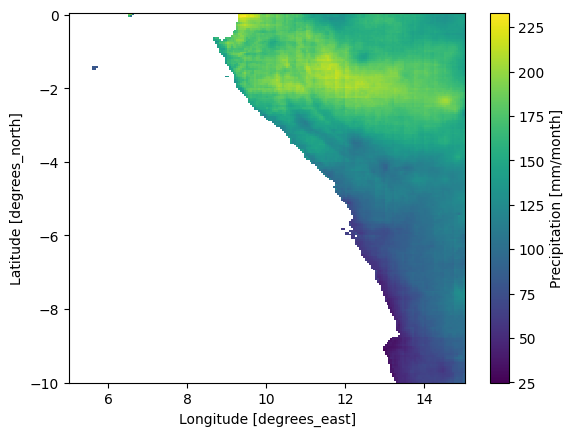

In [60]:
data_mean = data_nc.mean(dim='time')
data_mean.precip.plot()


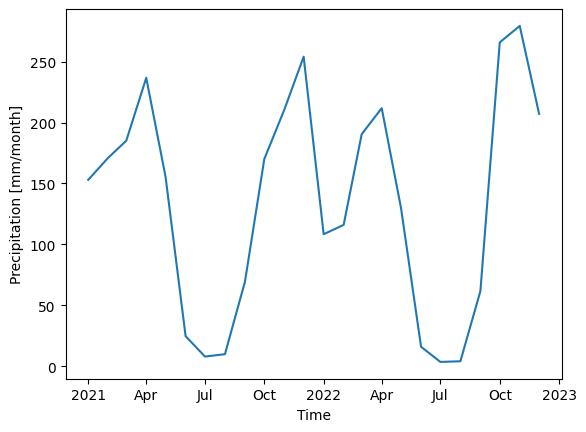

In [61]:
monthly_mean = data_nc.mean(['latitude','longitude'])
monthly_mean.precip.plot()